駅名を排除したらどうなるか。結果、精度が落ちた。

In [1]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv('./rentalhousev36_bom.csv')

In [2]:
df.head(100)

,id,賃料,区名,最寄駅徒歩分数,最寄路線名,最寄駅名,間取り,築総月数,方角,面積数字,...,バルコニー,トランクルーム,エレベーター,敷地内ごみ置き場,ルーフバルコニー,バリアフリー,駐車場,周辺環境,建物構造,契約期間
0,1,75000,北区,4,都営三田線,西巣鴨駅,1K,117,南東,20.01,...,1,0,1,1,0,0,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,中央区,5,都営大江戸線,勝どき駅,1R,538,NaN,16.50,...,1,0,1,1,0,0,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,渋谷区,6,京王線,笹塚駅,1K,102,南,22.05,...,1,0,1,1,0,0,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,杉並区,3,丸ノ内線(池袋－荻窪),新高円寺駅,2LDK,352,南,60.48,...,1,0,1,0,0,0,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,葛飾区,5,京成金町線,京成金町駅,2DK,379,南,39.66,...,1,0,0,0,0,0,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,103,182000,港区,13,日比谷線,広尾駅,1LDK,0,東,41.33,...,1,0,0,1,0,0,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 122m\t【スーパー】 692m\t【コンビニ】 124m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
96,104,95000,台東区,10,つくばエクスプレス,浅草(ＴＸ)駅,1K,3,北東,25.44,...,1,0,1,1,0,0,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t37,800円(税込)\t距離300m",【スーパー】 350m\t【スーパー】 745m\t【コンビニ】 486m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
97,105,78000,葛飾区,17,総武線・中央線（各停）,小岩駅,1K,166,東,31.68,...,1,0,0,1,0,0,"駐輪場\t空有\t駐車場\t近隣\t16,000円(税込)\t距離300m\tバイク置き場\t無",【スーパー】 650m\t【コンビニ】 180m\t【コンビニ】 450m\t【スーパー】 ...,軽量鉄骨,2年間
98,106,103000,杉並区,19,中央線（快速）,荻窪駅,2K,332,南,35.00,...,1,0,0,0,0,0,駐車場\t空有\t駐輪場\t空有\tバイク置き場\t無,NaN,軽量鉄骨,2年間


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28613 entries, 0 to 28612
Data columns (total 81 columns):
id                 28613 non-null int64
賃料                 28613 non-null int64
区名                 28613 non-null object
最寄駅徒歩分数            28613 non-null int64
最寄路線名              28613 non-null object
最寄駅名               28613 non-null object
間取り                28613 non-null object
築総月数               28613 non-null int64
方角                 25972 non-null object
面積数字               28613 non-null float64
何階建数字              28613 non-null int64
所在階数字（含地下）         28613 non-null int64
シャワー               28613 non-null int64
温水洗浄便座             28613 non-null int64
洗面台独立              28613 non-null int64
脱衣所                28613 non-null int64
追焚機能               28613 non-null int64
浴室乾燥機              28613 non-null int64
バス・トイレ別            28613 non-null int64
バスなし               28613 non-null int64
専用トイレ              28613 non-null int64
共同トイレ              28613 non-null int64
共同バス

In [4]:
df.corr()

,id,賃料,最寄駅徒歩分数,築総月数,面積数字,何階建数字,所在階数字（含地下）,シャワー,温水洗浄便座,洗面台独立,...,タイル張り,フローリング,ウォークインクローゼット,シューズボックス,バルコニー,トランクルーム,エレベーター,敷地内ごみ置き場,ルーフバルコニー,バリアフリー
id,1.000000,-0.007770,-0.001048,0.000744,-0.005441,-0.005390,0.000445,0.007199,0.002373,0.003080,...,0.001510,0.010255,0.002150,0.002610,0.000688,-0.007042,-0.002978,0.003370,0.002205,-0.004038
賃料,-0.007770,1.000000,-0.162241,-0.377838,0.654108,0.479282,0.375417,0.075381,0.419844,0.555714,...,0.243684,0.195137,0.287716,0.291993,0.279421,0.107094,0.449487,0.275050,0.052946,0.063842
最寄駅徒歩分数,-0.001048,-0.162241,1.000000,0.070724,0.172241,-0.283394,-0.227770,-0.042970,-0.101110,-0.014379,...,-0.169943,-0.081018,0.012609,-0.059153,-0.061810,0.000148,-0.269306,-0.091076,-0.008909,0.008191
築総月数,0.000744,-0.377838,0.070724,1.000000,0.007785,-0.249292,-0.170285,-0.065853,-0.579204,-0.463019,...,-0.123645,-0.257751,-0.222618,-0.278048,-0.087491,-0.001522,-0.267127,-0.315983,-0.001426,-0.014228
面積数字,-0.005441,0.654108,0.172241,0.007785,1.000000,0.094425,0.065712,0.065588,0.118959,0.432527,...,0.038595,0.064861,0.201644,0.166965,0.232695,0.084653,0.104069,0.061511,0.038602,0.060320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
トランクルーム,-0.007042,0.107094,0.000148,-0.001522,0.084653,0.104430,0.068585,0.009712,0.044019,0.052653,...,0.042712,0.015732,0.026937,0.033411,0.029754,1.000000,0.059585,0.028058,-0.003572,0.036651
エレベーター,-0.002978,0.449487,-0.269306,-0.267127,0.104069,0.668969,0.507182,0.062609,0.269631,0.276499,...,0.430234,0.174948,0.090256,0.240838,0.357263,0.059585,1.000000,0.335221,0.023866,0.042103
敷地内ごみ置き場,0.003370,0.275050,-0.091076,-0.315983,0.061511,0.303341,0.226232,0.137453,0.320706,0.283185,...,0.343530,0.251591,0.136100,0.382751,0.225665,0.028058,0.335221,1.000000,0.030824,0.024585
ルーフバルコニー,0.002205,0.052946,-0.008909,-0.001426,0.038602,0.007287,0.026361,-0.009231,0.013998,0.025095,...,0.020724,0.007530,0.002558,0.022320,0.044581,-0.003572,0.023866,0.030824,1.000000,-0.004694


In [5]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

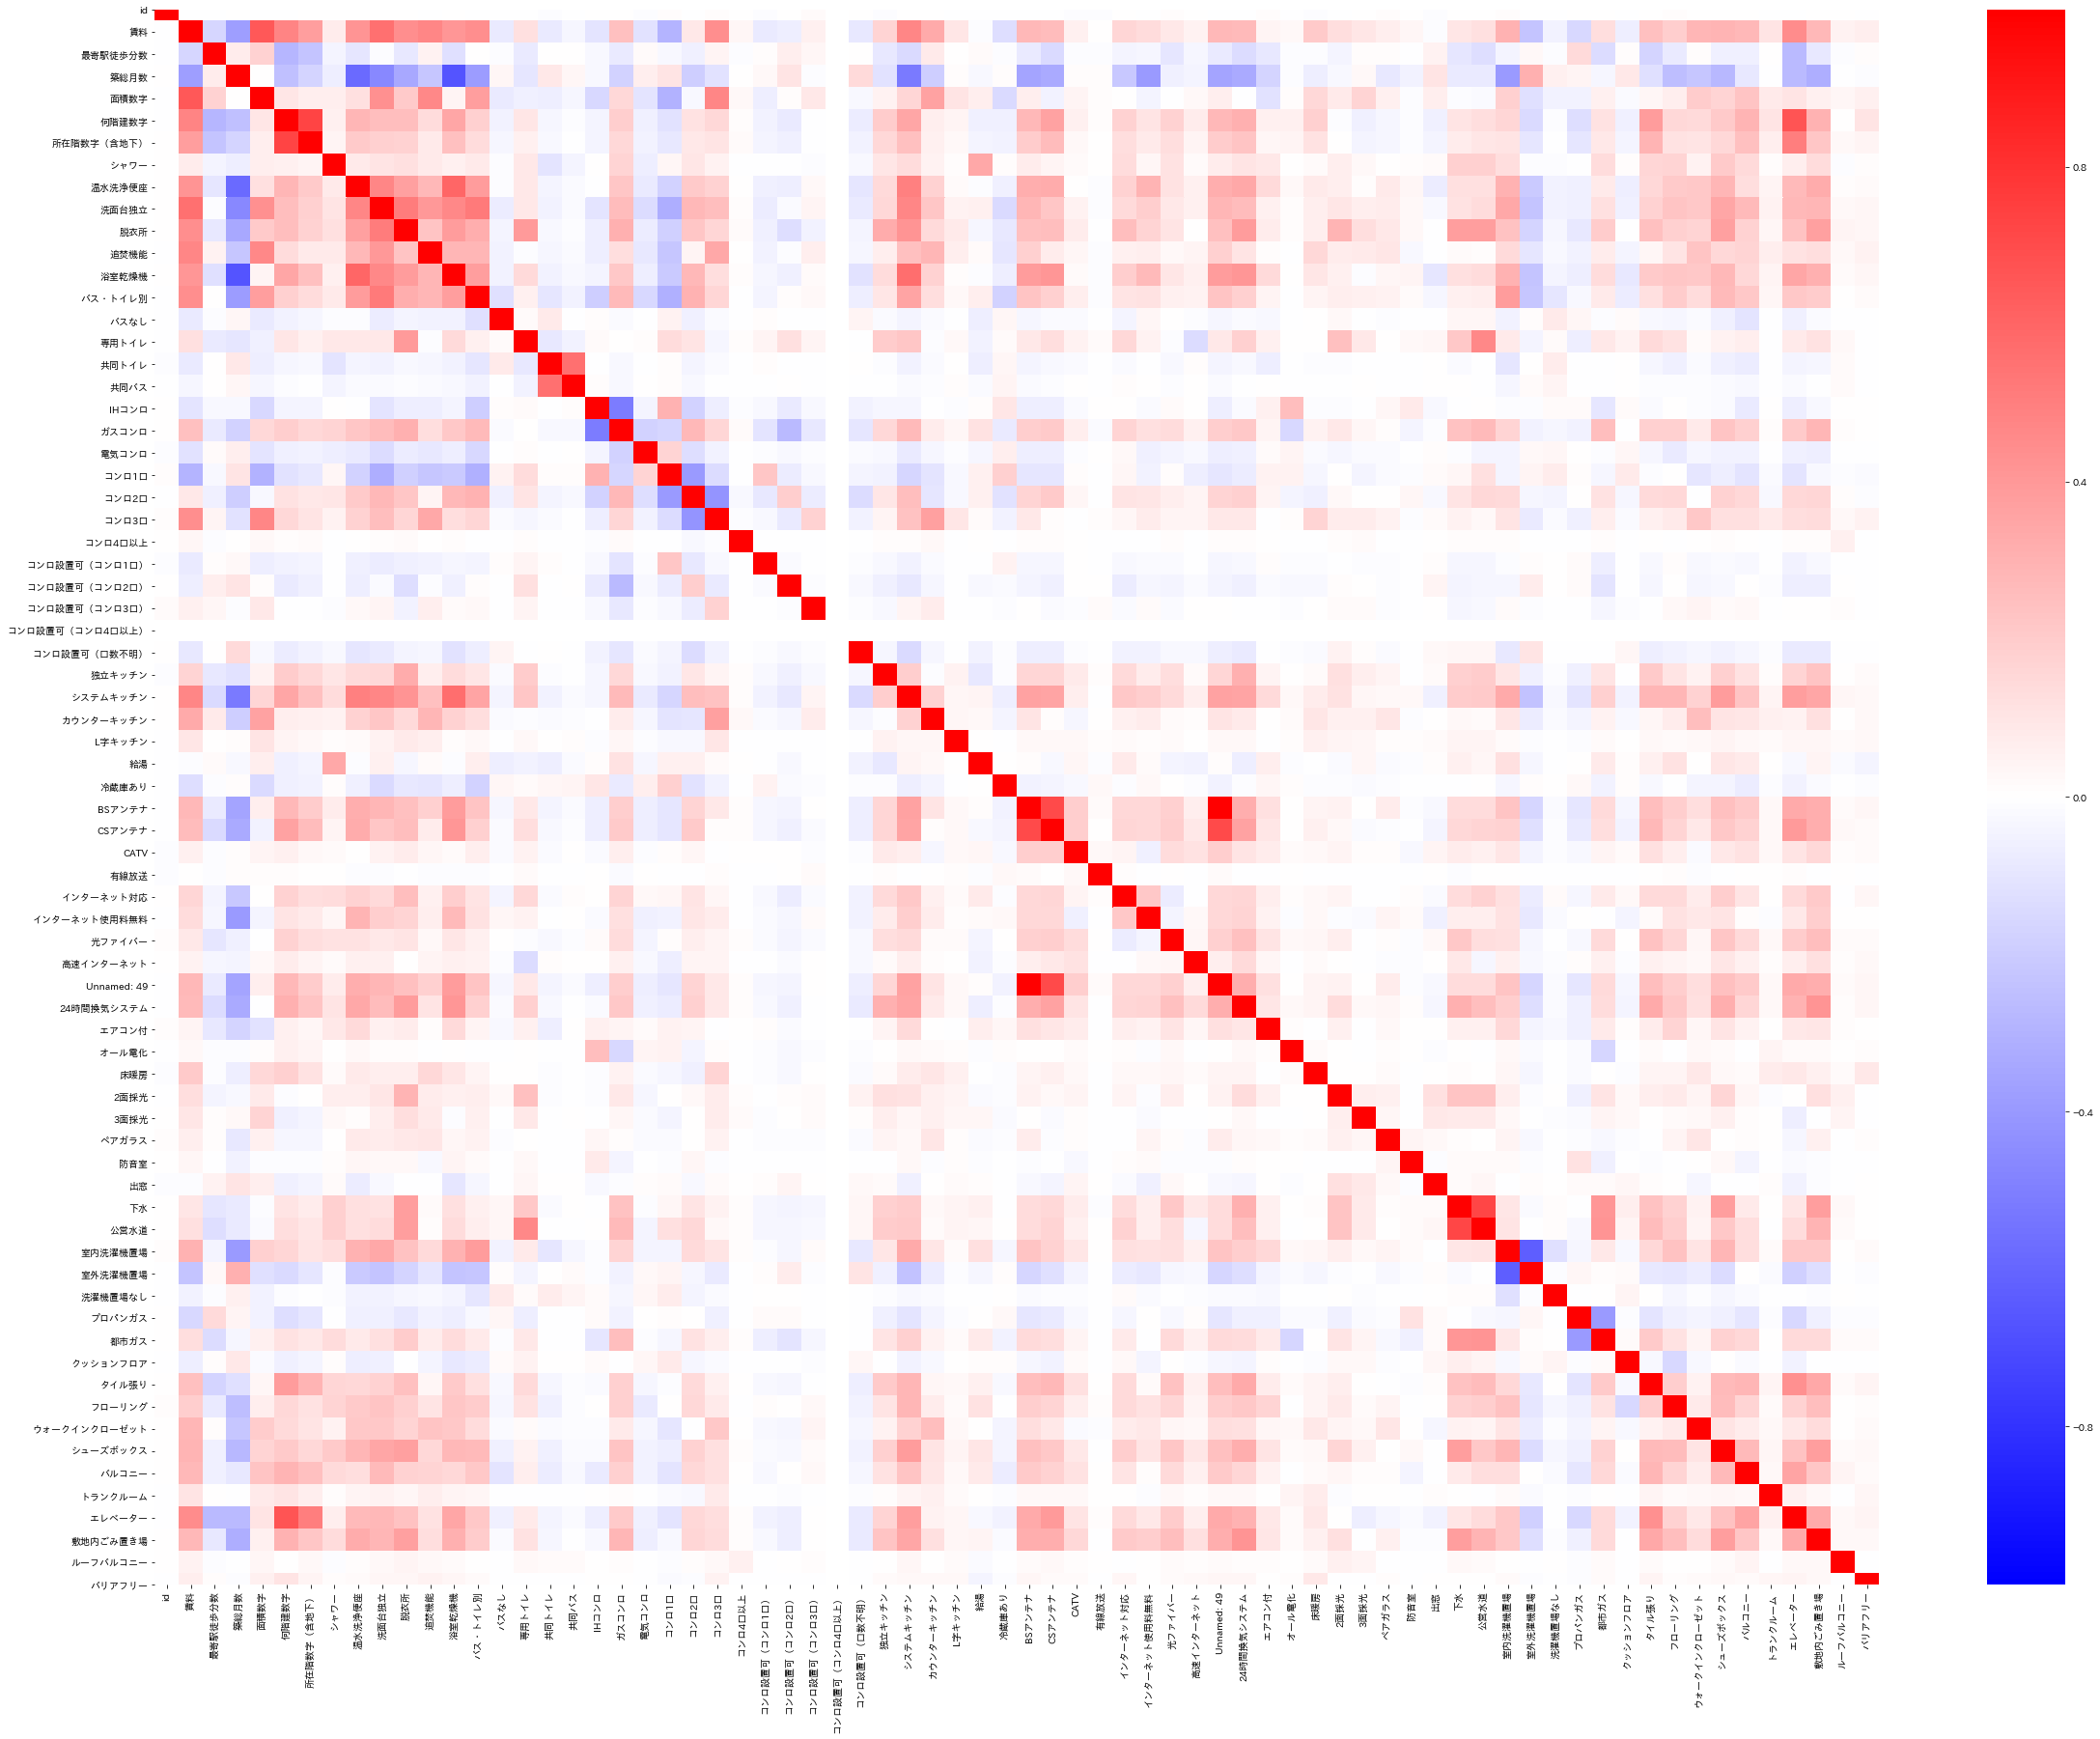

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()

plt.figure(figsize=(40, 30))
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, cmap='bwr')

In [7]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [8]:
df = pd.get_dummies(df, columns=['区名', '最寄路線名', '間取り', '方角', '建物構造'])

In [9]:
df = df.drop(['最寄駅名', '駐車場', '周辺環境', '契約期間'], axis=1)

In [10]:
df

,id,賃料,最寄駅徒歩分数,築総月数,面積数字,何階建数字,所在階数字（含地下）,シャワー,温水洗浄便座,洗面台独立,脱衣所,追焚機能,浴室乾燥機,バス・トイレ別,バスなし,専用トイレ,共同トイレ,共同バス,IHコンロ,ガスコンロ,電気コンロ,コンロ1口,コンロ2口,コンロ3口,コンロ4口以上,コンロ設置可（コンロ1口）,コンロ設置可（コンロ2口）,コンロ設置可（コンロ3口）,コンロ設置可（コンロ4口以上）,コンロ設置可（口数不明）,独立キッチン,システムキッチン,カウンターキッチン,L字キッチン,給湯,冷蔵庫あり,BSアンテナ,CSアンテナ,CATV,有線放送,インターネット対応,インターネット使用料無料,光ファイバー,高速インターネット,Unnamed: 49,24時間換気システム,エアコン付,オール電化,床暖房,2面採光,3面採光,ペアガラス,防音室,出窓,下水,公営水道,室内洗濯機置場,室外洗濯機置場,洗濯機置場なし,プロパンガス,都市ガス,クッションフロア,タイル張り,フローリング,ウォークインクローゼット,シューズボックス,バルコニー,トランクルーム,エレベーター,敷地内ごみ置き場,ルーフバルコニー,バリアフリー,区名_世田谷区,区名_中央区,区名_中野区,区名_北区,区名_千代田区,区名_台東区,区名_品川区,区名_墨田区,区名_大田区,区名_文京区,区名_新宿区,区名_杉並区,区名_板橋区,区名_江戸川区,区名_江東区,区名_渋谷区,区名_港区,区名_目黒区,区名_練馬区,区名_荒川区,区名_葛飾区,区名_豊島区,区名_足立区,最寄路線名_つくばエクスプレス,最寄路線名_ゆりかもめ,最寄路線名_りんかい線,最寄路線名_中央線（快速）,最寄路線名_丸ノ内線(中野坂上－方南町),最寄路線名_丸ノ内線(池袋－荻窪),最寄路線名_京急本線,最寄路線名_京急空港線,最寄路線名_京成成田空港線,最寄路線名_京成押上線,最寄路線名_京成本線,最寄路線名_京成金町線,最寄路線名_京浜東北線,最寄路線名_京王井の頭線,最寄路線名_京王新線,最寄路線名_京王線,最寄路線名_京葉線(東京－蘇我),最寄路線名_副都心線,最寄路線名_北総線,最寄路線名_千代田線,最寄路線名_半蔵門線,最寄路線名_南北線,最寄路線名_埼京線,最寄路線名_埼玉高速鉄道線,最寄路線名_小田急小田原線,最寄路線名_山手線,最寄路線名_常磐線,最寄路線名_常磐線快速,最寄路線名_日暮里・舎人ライナー,最寄路線名_日比谷線,最寄路線名_有楽町線,最寄路線名_東京モノレール羽田線,最寄路線名_東北本線（宇都宮線）,最寄路線名_東急世田谷線,最寄路線名_東急多摩川線,最寄路線名_東急大井町線,最寄路線名_東急東横線,最寄路線名_東急池上線,最寄路線名_東急田園都市線,最寄路線名_東急目黒線,最寄路線名_東武スカイツリーライン,最寄路線名_東武亀戸線,最寄路線名_東武伊勢崎線(押上－曳舟),最寄路線名_東武大師線,最寄路線名_東武東上線,最寄路線名_東海道新幹線,最寄路線名_東海道本線,最寄路線名_東西線,最寄路線名_横須賀線,最寄路線名_湘南新宿ライン(高崎線－東海道本線),最寄路線名_総武本線,最寄路線名_総武線・中央線（各停）,最寄路線名_西武新宿線,最寄路線名_西武有楽町線,最寄路線名_西武池袋線,最寄路線名_西武豊島線,最寄路線名_都営三田線,最寄路線名_都営大江戸線,最寄路線名_都営新宿線,最寄路線名_都営浅草線,最寄路線名_都電荒川線,最寄路線名_銀座線,最寄路線名_高崎線,間取り_1DK,間取り_1DK+S(納戸),間取り_1K,間取り_1K+S(納戸),間取り_1LDK,間取り_1LDK+S(納戸),間取り_1LK+S(納戸),間取り_1R,間取り_2DK,間取り_2DK+S(納戸),間取り_2K,間取り_2K+S(納戸),間取り_2LDK,間取り_2LDK+S(納戸),間取り_3DK,間取り_3DK+S(納戸),間取り_3K,間取り_3LDK,間取り_3LDK+S(納戸),間取り_4DK,間取り_4K,間取り_4LDK,間取り_4LDK+S(納戸),間取り_5DK,間取り_5LDK,間取り_5LDK+S(納戸),方角_北,方角_北東,方角_北西,方角_南,方角_南東,方角_南西,方角_東,方角_西,建物構造_ALC（軽量気泡コンクリート）,建物構造_HPC（プレキャスト・コンクリート（重量鉄骨））,建物構造_PC（プレキャスト・コンクリート（鉄筋コンクリート））,建物構造_RC（鉄筋コンクリート）,建物構造_SRC（鉄骨鉄筋コンクリート）,建物構造_その他,建物構造_ブロック,建物構造_木造,建物構造_軽量鉄骨,建物構造_鉄骨造
0,1,75000,4,117,20.01,12,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,76000,5,538,16.50,10,5,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,110000,6,102,22.05,15,12,1,1,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,150000,3,352,60.48,4,3,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,74000,5,379,39.66,2,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28613 entries, 0 to 28612
Columns: 202 entries, id to 建物構造_鉄骨造
dtypes: float64(1), int64(71), uint8(130)
memory usage: 19.3 MB


データを、学習用train（この後、モデル作成のための学習用model_trainとモデル評価用model_testに分ける）と予測用predict（賃料未知のデータということにしておく）に分割

In [12]:
# 評価用データとして元データからランダムに300件を抽出
df_predict = df.sample(n=300, random_state=0)

In [13]:
# 学習用データは元データから評価用データを除いたもの
df_train = df[~df['id'].isin(df_predict['id'])]

In [14]:
# df_xxx_xは目的変数を除去したデータ
df_train_x = df_train.drop(['賃料'], axis=1)

In [15]:
# df_xxx_yは目的変数のみのデータ
df_train_y = df_train['賃料']

In [16]:
# df_xxx_xは目的変数を除去したデータ
df_predict_x = df_predict.drop(['賃料'], axis=1)

In [17]:
# df_xxx_yは目的変数のみのデータ
df_predict_y = df_predict['賃料']

In [18]:
# idだけ保持しておく
df_train_team_x = df_train['id']
df_predict_team_x = df_predict['id']

idデータの消去

In [19]:
df_train_x = df_train_x.drop(['id'], axis=1)

In [20]:
df_predict_x = df_predict_x.drop(['id'], axis=1)

In [21]:
df_train_x.head()

,最寄駅徒歩分数,築総月数,面積数字,何階建数字,所在階数字（含地下）,シャワー,温水洗浄便座,洗面台独立,脱衣所,追焚機能,浴室乾燥機,バス・トイレ別,バスなし,専用トイレ,共同トイレ,共同バス,IHコンロ,ガスコンロ,電気コンロ,コンロ1口,コンロ2口,コンロ3口,コンロ4口以上,コンロ設置可（コンロ1口）,コンロ設置可（コンロ2口）,コンロ設置可（コンロ3口）,コンロ設置可（コンロ4口以上）,コンロ設置可（口数不明）,独立キッチン,システムキッチン,カウンターキッチン,L字キッチン,給湯,冷蔵庫あり,BSアンテナ,CSアンテナ,CATV,有線放送,インターネット対応,インターネット使用料無料,光ファイバー,高速インターネット,Unnamed: 49,24時間換気システム,エアコン付,オール電化,床暖房,2面採光,3面採光,ペアガラス,防音室,出窓,下水,公営水道,室内洗濯機置場,室外洗濯機置場,洗濯機置場なし,プロパンガス,都市ガス,クッションフロア,タイル張り,フローリング,ウォークインクローゼット,シューズボックス,バルコニー,トランクルーム,エレベーター,敷地内ごみ置き場,ルーフバルコニー,バリアフリー,区名_世田谷区,区名_中央区,区名_中野区,区名_北区,区名_千代田区,区名_台東区,区名_品川区,区名_墨田区,区名_大田区,区名_文京区,区名_新宿区,区名_杉並区,区名_板橋区,区名_江戸川区,区名_江東区,区名_渋谷区,区名_港区,区名_目黒区,区名_練馬区,区名_荒川区,区名_葛飾区,区名_豊島区,区名_足立区,最寄路線名_つくばエクスプレス,最寄路線名_ゆりかもめ,最寄路線名_りんかい線,最寄路線名_中央線（快速）,最寄路線名_丸ノ内線(中野坂上－方南町),最寄路線名_丸ノ内線(池袋－荻窪),最寄路線名_京急本線,最寄路線名_京急空港線,最寄路線名_京成成田空港線,最寄路線名_京成押上線,最寄路線名_京成本線,最寄路線名_京成金町線,最寄路線名_京浜東北線,最寄路線名_京王井の頭線,最寄路線名_京王新線,最寄路線名_京王線,最寄路線名_京葉線(東京－蘇我),最寄路線名_副都心線,最寄路線名_北総線,最寄路線名_千代田線,最寄路線名_半蔵門線,最寄路線名_南北線,最寄路線名_埼京線,最寄路線名_埼玉高速鉄道線,最寄路線名_小田急小田原線,最寄路線名_山手線,最寄路線名_常磐線,最寄路線名_常磐線快速,最寄路線名_日暮里・舎人ライナー,最寄路線名_日比谷線,最寄路線名_有楽町線,最寄路線名_東京モノレール羽田線,最寄路線名_東北本線（宇都宮線）,最寄路線名_東急世田谷線,最寄路線名_東急多摩川線,最寄路線名_東急大井町線,最寄路線名_東急東横線,最寄路線名_東急池上線,最寄路線名_東急田園都市線,最寄路線名_東急目黒線,最寄路線名_東武スカイツリーライン,最寄路線名_東武亀戸線,最寄路線名_東武伊勢崎線(押上－曳舟),最寄路線名_東武大師線,最寄路線名_東武東上線,最寄路線名_東海道新幹線,最寄路線名_東海道本線,最寄路線名_東西線,最寄路線名_横須賀線,最寄路線名_湘南新宿ライン(高崎線－東海道本線),最寄路線名_総武本線,最寄路線名_総武線・中央線（各停）,最寄路線名_西武新宿線,最寄路線名_西武有楽町線,最寄路線名_西武池袋線,最寄路線名_西武豊島線,最寄路線名_都営三田線,最寄路線名_都営大江戸線,最寄路線名_都営新宿線,最寄路線名_都営浅草線,最寄路線名_都電荒川線,最寄路線名_銀座線,最寄路線名_高崎線,間取り_1DK,間取り_1DK+S(納戸),間取り_1K,間取り_1K+S(納戸),間取り_1LDK,間取り_1LDK+S(納戸),間取り_1LK+S(納戸),間取り_1R,間取り_2DK,間取り_2DK+S(納戸),間取り_2K,間取り_2K+S(納戸),間取り_2LDK,間取り_2LDK+S(納戸),間取り_3DK,間取り_3DK+S(納戸),間取り_3K,間取り_3LDK,間取り_3LDK+S(納戸),間取り_4DK,間取り_4K,間取り_4LDK,間取り_4LDK+S(納戸),間取り_5DK,間取り_5LDK,間取り_5LDK+S(納戸),方角_北,方角_北東,方角_北西,方角_南,方角_南東,方角_南西,方角_東,方角_西,建物構造_ALC（軽量気泡コンクリート）,建物構造_HPC（プレキャスト・コンクリート（重量鉄骨））,建物構造_PC（プレキャスト・コンクリート（鉄筋コンクリート））,建物構造_RC（鉄筋コンクリート）,建物構造_SRC（鉄骨鉄筋コンクリート）,建物構造_その他,建物構造_ブロック,建物構造_木造,建物構造_軽量鉄骨,建物構造_鉄骨造
0,4,117,20.01,12,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5,538,16.50,10,5,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,102,22.05,15,12,1,1,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,352,60.48,4,3,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,379,39.66,2,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

標準化する

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
#学習用データ
x_sc_df = StandardScaler()

#元データから平均と分散の算出
x_sc_df.fit(df_train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
#元データを標準化
df_train_x_std = x_sc_df.transform(df_train_x)

In [25]:
#予測用データ
x_sc_df = StandardScaler()

#元データから平均と分析の算出
x_sc_df.fit(df_predict_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
#元データを標準化
df_predict_x_std = x_sc_df.transform(df_predict_x)

In [27]:
df_predict_x_std

array([[-0.43167919,  0.9042382 ,  0.02357251, ..., -0.4843221 ,
        -0.19509558, -0.35156152],
       [ 0.76300492, -0.70300776, -0.74724325, ..., -0.4843221 ,
        -0.19509558, -0.35156152],
       [ 0.76300492, -0.18552326, -0.84006788, ..., -0.4843221 ,
        -0.19509558, -0.35156152],
       ...,
       [-0.19274237,  1.26343332, -1.12299737, ..., -0.4843221 ,
        -0.19509558, -0.35156152],
       [-0.19274237,  1.65306871, -0.14276924, ..., -0.4843221 ,
        -0.19509558,  2.84445234],
       [-0.19274237, -0.155083  , -0.0751929 , ..., -0.4843221 ,
        -0.19509558, -0.35156152]])

In [28]:
#目的変数は一行だけなので、公式に当てはめて計算
df_train_y_std = (df_train_y - df_train_y.mean()) / df_train_y.std()
df_predict_y_std = (df_predict_y - df_predict_y.mean()) / df_predict_y.std()

重回帰分析のためのモデル作成

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [31]:
#線形回帰モデルへ当てはめ
linreg.fit(df_train_x_std, df_train_y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
df_train_x_std

array([[-0.71470467, -0.49384583, -0.81975953, ..., -0.47499257,
        -0.25675132, -0.37874978],
       [-0.49223215,  2.02137411, -1.06983388, ..., -0.47499257,
        -0.25675132,  2.64026556],
       [-0.26975962, -0.58346174, -0.67441717, ..., -0.47499257,
        -0.25675132, -0.37874978],
       ...,
       [-0.49223215,  2.09306684,  2.02937816, ..., -0.47499257,
        -0.25675132,  2.64026556],
       [-0.71470467, -0.40422992, -0.13722042, ...,  2.1052961 ,
        -0.25675132, -0.37874978],
       [-0.49223215,  3.12066264, -0.46424072, ..., -0.47499257,
        -0.25675132,  2.64026556]])

In [33]:
df_train_y_std

0       -0.752880
1       -0.725438
2        0.207578
3        1.305244
4       -0.780321
           ...   
28608   -0.615671
28609   -1.315434
28610    0.619203
28611   -0.121722
28612   -0.588230
Name: 賃料, Length: 28313, dtype: float64

In [34]:
test_result = linreg.predict(df_train_x_std)

In [35]:
# 予測結果を逆標準化
# 予測値
y_test_data_predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = df_train_y_std * df_train_y.std() + df_train_y.mean()

In [36]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


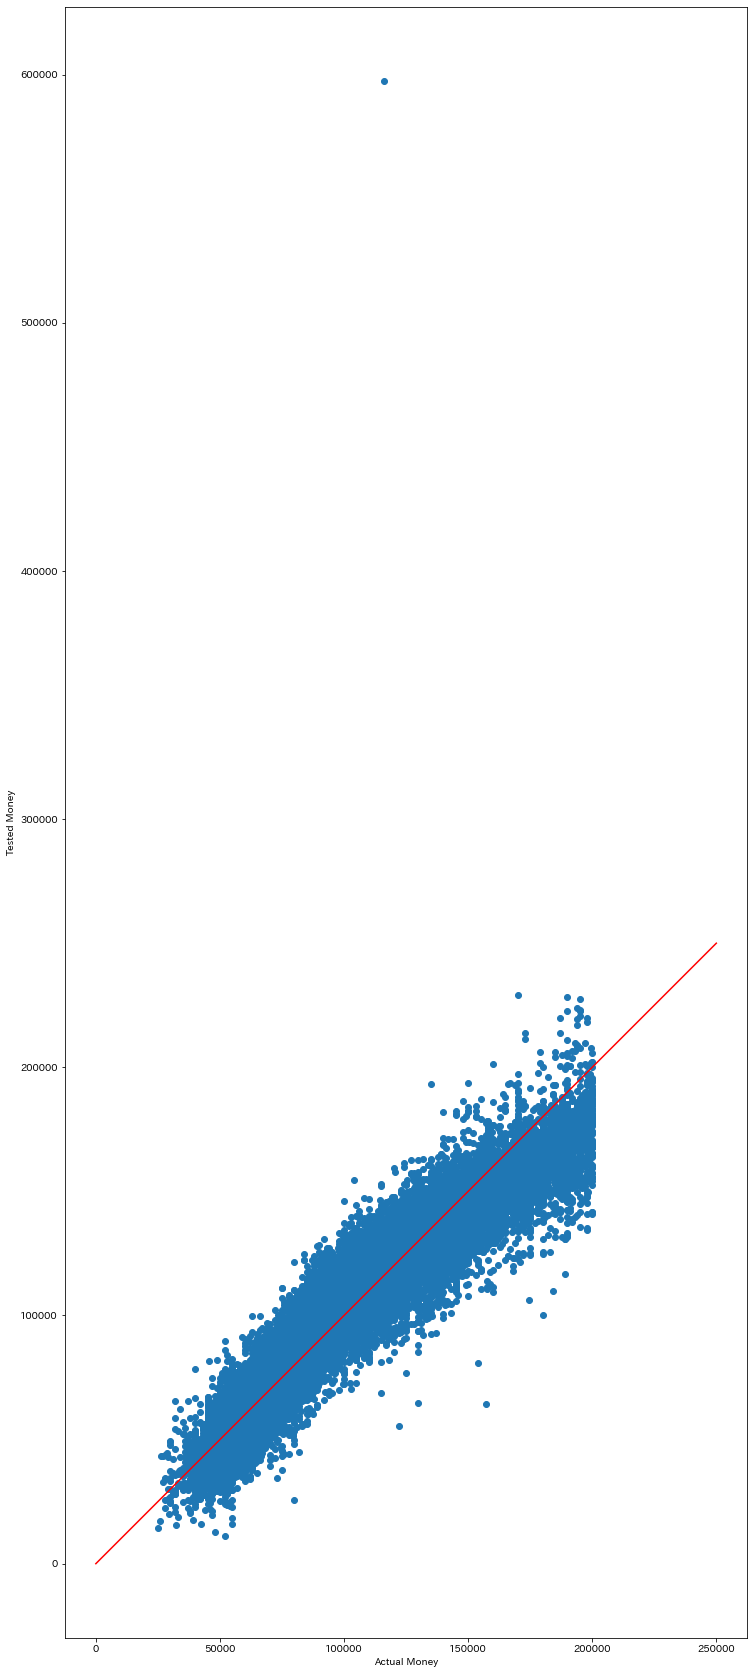

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,30))
plt.scatter(y_pred_val, y_test_data_predict)
plt.xlabel("Actual Money")
plt.ylabel("Tested Money")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 250000)
y=x
plt.plot(x,y,color="red")

In [38]:
rmse = np.sqrt(sum((y_pred_val - y_test_data_predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

RMSE =  12662.958573736094


In [39]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

最寄路線名_都営新宿線        5.879864e+10
最寄路線名_東西線          5.919372e+10
最寄路線名_山手線          6.147839e+10
最寄路線名_都営三田線        6.174305e+10
区名_板橋区             6.331984e+10
区名_練馬区             6.453839e+10
区名_江戸川区            6.475679e+10
区名_杉並区             6.484752e+10
区名_大田区             6.875422e+10
区名_足立区             7.255726e+10
間取り_2LDK          -7.292934e+10
間取り_2DK           -7.767271e+10
間取り_1DK           -7.844362e+10
区名_世田谷区            8.174247e+10
間取り_1LDK          -1.100201e+11
間取り_1R            -1.206586e+11
間取り_1K            -1.561270e+11
Unnamed: 49        1.804946e+11
BSアンテナ            -1.804946e+11
コンロ設置可（コンロ4口以上）    4.681824e+11
Name: Coef, dtype: float64

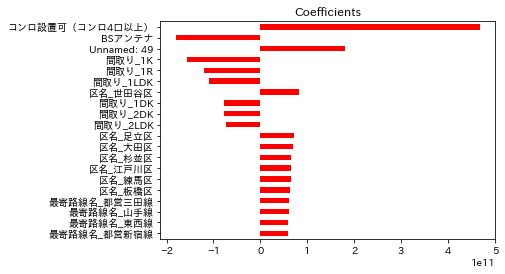

In [40]:
coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_x.columns
coef_df= coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(20)

In [41]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\yk13525\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [42]:
import matplotlib as mpl
mpl.get_configdir()

'C:\\Users\\yk13525\\.matplotlib'

#学習データと予測データに分割(学習データ:予測データ=7:3)
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(df_train_x_std, df_train_y_std, test_size=0.3)

print(x_train_data)

#線形回帰モデルへ当てはめ
linreg.fit(x_train_data, y_train_data)

#予測実行
test_result = linreg.predict(x_test_data)

# 予測結果を逆標準化
# 予測値
y_test_data_predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_test_data * df_train_y.std() + df_train_y.mean()

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(y_pred_val, y_test_data_predict)
plt.xlabel("Actual Money")
plt.ylabel("Tested Money")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 1000)
y=x
plt.plot(x,y,color="red")

rmse = np.sqrt(sum((y_pred_val - y_test_data_predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_x.columns
coef_df= coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(20)

linreg_all = LinearRegression()

linreg_all.fit(df_train_x_std,df_train_y_std)

y_predict_result = linreg_all.predict(df_predict_x_std)

coef_all_df = pd.DataFrame({"Coef":linreg_all.coef_, "Coef_abs":np.abs(linreg_all.coef_)})
coef_all_df.index = df_predict_x.columns
coef_all_df = coef_all_df.sort_values(by="Coef_abs")
coef_all_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_all_df["Coef"].tail(20)

# 予測結果を逆標準化
df_predict_y.predict = y_predict_result * df_predict_y.std() + df_predict_y.mean()
y_predict_result_val = df_predict_y

plt.figure(figsize=(10,10))
plt.scatter(y_predict_result_val, df_predict_y.predict)
plt.xlabel("Actual Ratio")
plt.ylabel("Predicted Ratio")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 2)
y=x
plt.plot(x,y,color="red")

rmse = np.sqrt(sum((y_predict_result_val - df_predict_y.predict) ** 2) / len(y_predict_result_val))
print("RMSE = ", rmse)